In [1]:
import pandas as pd

In [2]:
df  = pd.read_csv('/Users/drazenzack/Desktop/LLM_model/Model_Results/test_results.csv')

In [3]:
new_model = df.sort_values(by=['similarity_score'], ascending=False)

In [4]:
df2  = pd.read_csv('/Users/drazenzack/Desktop/LLM_model/Model_Results/basemodel_results.csv')
base_model = df2.sort_values(by=['similarity_score'], ascending=False)

In [5]:
base_model['similarity_score'].mean()

np.float64(0.6711428571428572)

In [6]:
new_model['similarity_score'].mean()

np.float64(0.8191428571428573)

In [7]:
base_model

,test_case_id,instruction,expected_output,generated_output,similarity_score,is_correct,method_correct,error
0,1,Sort the DataFrame by day_ahead. \nColumns: IN...,df.sort_values('day_ahead'),df.sort_values(by='day_ahead'),0.95,True,True,NaN
13,14,Sort the DataFrame by day_ahead. \nColumns: IN...,df.sort_values('day_ahead'),df.sort_values(by='day_ahead'),0.95,True,True,NaN
3,4,Sort the DataFrame by power_OBS. \nColumns: IN...,df.sort_values('power_OBS'),df.sort_values(by='power_OBS'),0.95,True,True,NaN
57,58,Sort the DataFrame by power_OBS. \nColumns: IN...,df.sort_values('power_OBS'),df.sort_values(by='power_OBS'),0.95,True,True,NaN
39,40,Sort the DataFrame by day_ahead. \nColumns: IN...,df.sort_values('day_ahead'),df.sort_values(by='day_ahead'),0.95,True,True,NaN
...,...,...,...,...,...,...,...,...
44,45,Compute the sum of power_OBS grouped by models...,df.groupby('models')['power_OBS'].sum(),data = {'INIT_DATE_TIME': ['2023-04-01 10:00:0...,0.10,False,False,NaN
43,44,Compute the sum of power_OBS grouped by models...,df.groupby('LZ')['gain'].sum(),data = {'INIT_DATE_TIME': ['2023-04-01 10:00:0...,0.10,False,False,NaN
31,32,Compute the sum of pred grouped by models. \nC...,df.groupby('LZ')['power_OBS'].sum(),data = {'INIT_DATE_TIME': ['2023-04-01 10:00:0...,0.10,False,False,NaN
17,18,Compute the sum of power_OBS grouped by models...,df.groupby('LZ')['gain'].sum(),data = {'INIT_DATE_TIME': ['2023-04-01 10:00:0...,0.10,False,False,NaN


In [8]:
new_model

,test_case_id,instruction,expected_output,generated_output,similarity_score,is_correct,method_correct,error
0,1,Sort the DataFrame by day_ahead. \nColumns: IN...,df.sort_values('day_ahead'),df.sort_values('day_ahead'),1.00,True,True,NaN
66,67,Sort the DataFrame by pred. \nColumns: INIT_DA...,df.sort_values('pred'),df.sort_values('pred'),1.00,True,True,NaN
22,23,Sort the DataFrame by gain. \nColumns: INIT_DA...,df.sort_values('gain'),df.sort_values('gain'),1.00,True,True,NaN
57,58,Sort the DataFrame by power_OBS. \nColumns: IN...,df.sort_values('power_OBS'),df.sort_values('power_OBS'),1.00,True,True,NaN
13,14,Sort the DataFrame by day_ahead. \nColumns: IN...,df.sort_values('day_ahead'),df.sort_values('day_ahead'),1.00,True,True,NaN
...,...,...,...,...,...,...,...,...
58,59,Compute the sum of day_ahead grouped by LZ. \n...,df.groupby('models')['gain'].sum(),df.groupby('LZ')['power_OBS'].sum(),0.70,False,False,NaN
16,17,Compute the mean of gain grouped by models. \n...,df.groupby('LZ')['gain'].mean(),df.groupby('models')['power_OBS'].mean(),0.70,False,True,NaN
26,27,Compute the mean of pred grouped by LZ. \nColu...,df.groupby('models')['day_ahead'].mean(),df.groupby('LZ')['power_OBS'].mean(),0.68,False,False,NaN
41,42,Filter rows where power_OBS is greater than 15...,df[df['day_ahead'] > 150],df[df['power_OBS'] > 150],0.68,False,False,NaN


In [9]:
num = 17

In [10]:
print(new_model[new_model['test_case_id'] == num]['instruction'].values[0])
print('------------------')
print(new_model[new_model['test_case_id'] == num]['expected_output'].values[0])
print('-----')
print(new_model[new_model['test_case_id'] == num]['generated_output'].values[0])

Compute the mean of gain grouped by models. 
Columns: INIT_DATE_TIME, LZ, models, power_OBS, day_ahead, pred, gain
------------------
df.groupby('LZ')['gain'].mean()
-----
df.groupby('models')['power_OBS'].mean()


In [11]:
print(base_model[base_model['test_case_id'] == num]['instruction'].values[0])
print('------------------')
print(base_model[base_model['test_case_id'] == num]['expected_output'].values[0])
print('-----')
print(base_model[base_model['test_case_id'] == num]['generated_output'].values[0])

Compute the mean of gain grouped by models. 
Columns: INIT_DATE_TIME, LZ, models, power_OBS, day_ahead, pred, gain
------------------
df.groupby('LZ')['gain'].mean()
-----
df.groupby('models')['gain'].mean().reset_index()


In [12]:
new_model[new_model['similarity_score'] > .85]

,test_case_id,instruction,expected_output,generated_output,similarity_score,is_correct,method_correct,error
0,1,Sort the DataFrame by day_ahead. \nColumns: IN...,df.sort_values('day_ahead'),df.sort_values('day_ahead'),1.00,True,True,NaN
66,67,Sort the DataFrame by pred. \nColumns: INIT_DA...,df.sort_values('pred'),df.sort_values('pred'),1.00,True,True,NaN
22,23,Sort the DataFrame by gain. \nColumns: INIT_DA...,df.sort_values('gain'),df.sort_values('gain'),1.00,True,True,NaN
57,58,Sort the DataFrame by power_OBS. \nColumns: IN...,df.sort_values('power_OBS'),df.sort_values('power_OBS'),1.00,True,True,NaN
13,14,Sort the DataFrame by day_ahead. \nColumns: IN...,df.sort_values('day_ahead'),df.sort_values('day_ahead'),1.00,True,True,NaN
39,40,Sort the DataFrame by day_ahead. \nColumns: IN...,df.sort_values('day_ahead'),df.sort_values('day_ahead'),1.00,True,True,NaN
9,10,Sort the DataFrame by gain. \nColumns: INIT_DA...,df.sort_values('gain'),df.sort_values('gain'),1.00,True,True,NaN
67,68,Compute the mean of pred grouped by models. \n...,df.groupby('models')['pred'].mean(),df.groupby('models')['pred'].mean(),1.00,True,True,NaN
3,4,Sort the DataFrame by power_OBS. \nColumns: IN...,df.sort_values('power_OBS'),df.sort_values('power_OBS'),1.00,True,True,NaN
44,45,Compute the sum of power_OBS grouped by models...,df.groupby('models')['power_OBS'].sum(),df.groupby('models')['power_OBS'].sum(),1.00,True,True,NaN


In [13]:
print('New Model:', new_model["is_correct"].mean().round(4))
print('Base Model:', base_model["is_correct"].mean().round(4))

New Model: 0.2
Base Model: 0.1286


In [14]:
print('New Model:', new_model["method_correct"].mean().round(4))
print('Base Model:', base_model["method_correct"].mean().round(4))

New Model: 0.9143
Base Model: 0.5143


In [15]:
print('New Model:', new_model.loc[~new_model["is_correct"], "similarity_score"].mean())
print('Base Model:', base_model.loc[~base_model["is_correct"], "similarity_score"].mean())

New Model: 0.7773214285714286
Base Model: 0.6313114754098361


In [16]:
near_miss_rate = (
    (new_model["similarity_score"] >= 0.8) &
    (new_model["similarity_score"] < .89)
).mean()

near_miss_rate

np.float64(0.2571428571428571)

In [17]:
near_miss_rate = (
    (base_model["similarity_score"] >= 0.8) &
    (base_model["similarity_score"] < .89)
).mean()

near_miss_rate

np.float64(0.05714285714285714)

In [18]:
print('New Model:', (new_model["similarity_score"] < 0.7).mean())
print('Base Model:', (base_model["similarity_score"] < 0.7).mean())

New Model: 0.04285714285714286
Base Model: 0.4857142857142857


In [19]:
new_model.assign(
    task_type=df["instruction"].str.split().str[0]
).groupby("task_type").agg(
    accuracy=("is_correct", "mean"),
    avg_similarity=("similarity_score", "mean"),
    count=("test_case_id", "count")
).sort_values("accuracy")

,accuracy,avg_similarity,count
task_type,,,
Compute,0.062500,0.800625,32
Filter,0.285714,0.802857,14
Sort,0.333333,0.853333,24


In [20]:
base_model.assign(
    task_type=df["instruction"].str.split().str[0]
).groupby("task_type").agg(
    accuracy=("is_correct", "mean"),
    avg_similarity=("similarity_score", "mean"),
    count=("test_case_id", "count")
).sort_values("accuracy")

,accuracy,avg_similarity,count
task_type,,,
Compute,0.000000,0.540625,32
Filter,0.071429,0.740714,14
Sort,0.333333,0.804583,24


In [21]:
final_score = (
    0.3 * new_model["is_correct"].mean() +
    0.4 * new_model["method_correct"].mean() +
    0.3 * new_model["similarity_score"].mean()
)

final_score

np.float64(0.6714571428571429)

In [22]:
final_score = (
    0.3 * base_model["is_correct"].mean() +
    0.4 * base_model["method_correct"].mean() +
    0.3 * base_model["similarity_score"].mean()
)

final_score

np.float64(0.4456285714285714)

In [45]:
cols = ["test_case_id", "is_correct", "similarity_score", "method_correct"]

new2 = new_model[cols].sort_values("test_case_id").reset_index(drop=True)
base2 = base_model[cols].sort_values("test_case_id").reset_index(drop=True)

assert (a["test_case_id"] == b["test_case_id"]).all()

In [31]:
# from scipy.stats import ttest_rel

# t_stat, p_value = ttest_rel(
#     new2["similarity_score"],
#     base2["similarity_score"]
# )

# t_stat, p_value

In [32]:

# import numpy as np
# diff = new2["similarity_score"] - base2["similarity_score"]

# boot_means = []
# rng = np.random.default_rng(42)

# for _ in range(10000):
#     sample = rng.choice(diff, size=len(diff), replace=True)
#     boot_means.append(sample.mean())

# ci_low, ci_high = np.percentile(boot_means, [2.5, 97.5])
# mean_diff = diff.mean()

# mean_diff, ci_low, ci_high

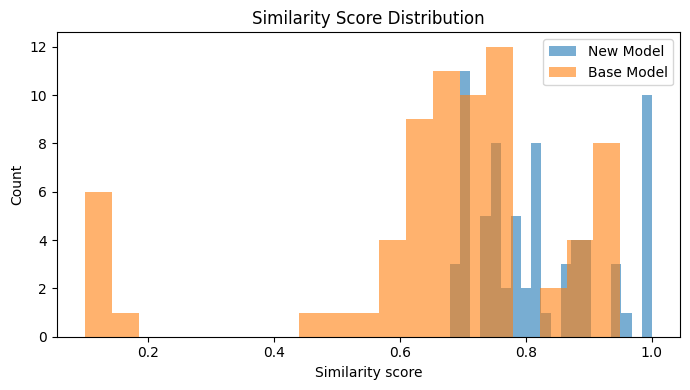

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.hist(new2["similarity_score"], bins=20, alpha=0.6, label="New Model")
plt.hist(base2["similarity_score"], bins=20, alpha=0.6, label="Base Model")
plt.xlabel("Similarity score")
plt.ylabel("Count")
plt.legend()
plt.title("Similarity Score Distribution")
plt.tight_layout()
plt.show()

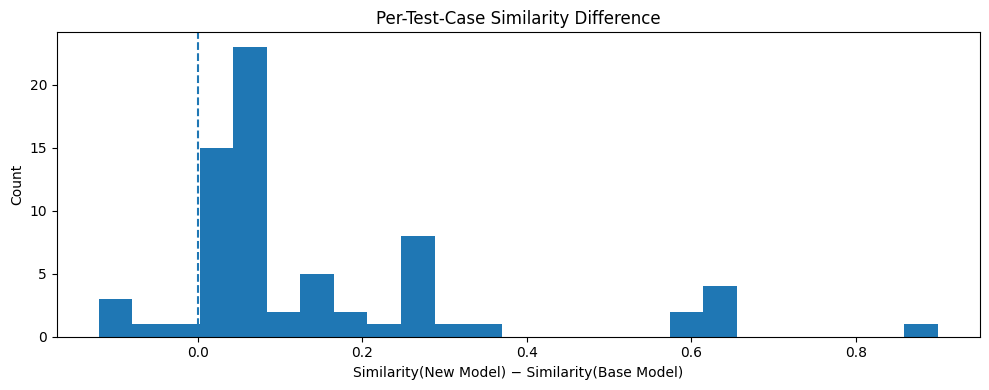

In [39]:
diff = new2["similarity_score"] - base2["similarity_score"]

plt.figure(figsize=(10,4))
plt.hist(diff, bins=25)
plt.axvline(0, linestyle="--")
plt.xlabel("Similarity(New Model) − Similarity(Base Model)")
plt.ylabel("Count")
plt.title("Per-Test-Case Similarity Difference")
plt.tight_layout()
plt.show()

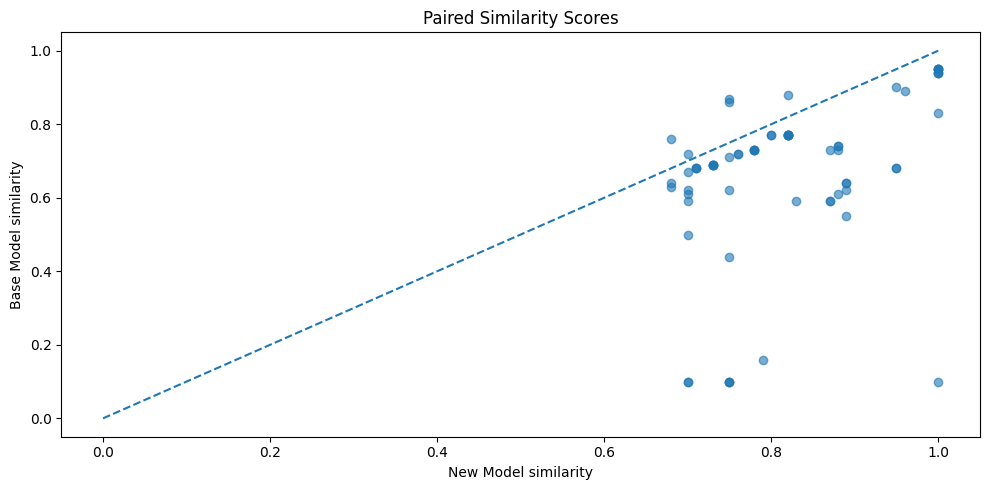

In [38]:
plt.figure(figsize=(10,5))
plt.scatter(
    x= new2["similarity_score"],
    y= base2["similarity_score"],
    alpha=0.6
)
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("New Model similarity")
plt.ylabel("Base Model similarity")
plt.title("Paired Similarity Scores")
plt.tight_layout()
plt.show()

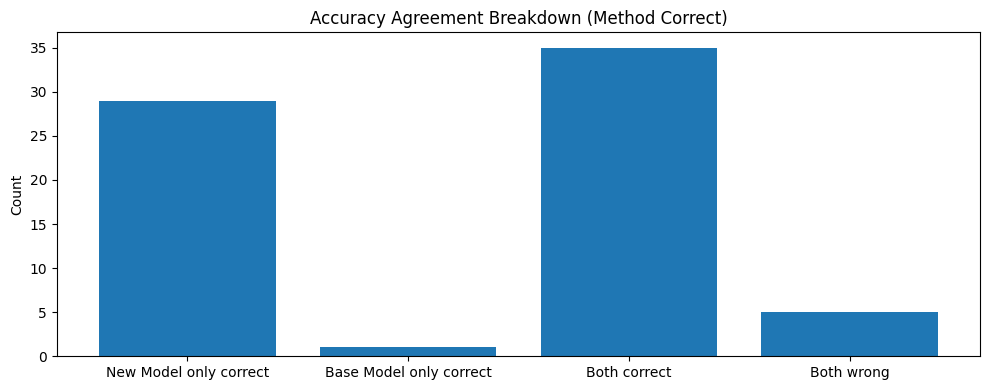

In [46]:
a_only = ((new2.method_correct) & (~base2.method_correct)).sum()
b_only = ((~new2.method_correct) & (base2.method_correct)).sum()
both = ((new2.method_correct) & (base2.method_correct)).sum()
neither = ((~new2.method_correct) & (~base2.method_correct)).sum()

plt.figure(figsize=(10,4))
plt.bar(
    ["New Model only correct", "Base Model only correct", "Both correct", "Both wrong"],
    [a_only, b_only, both, neither]
)
plt.ylabel("Count")
plt.title("Accuracy Agreement Breakdown (Method Correct)")
plt.tight_layout()
plt.show()

/var/folders/tt/5g7kjc2j66b3f51x1pj2tcqh0000gn/T/ipykernel_21203/2770892061.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([err_new, err_base], labels=["New Model", "Base Model"])


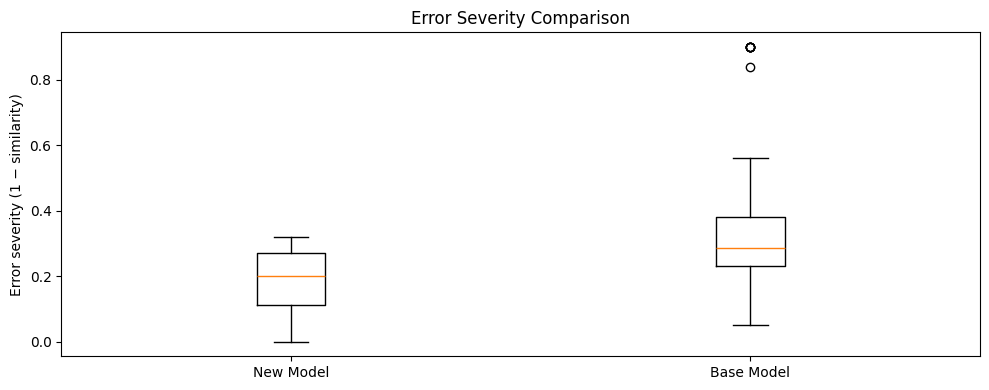

In [47]:
err_new = 1 - new2["similarity_score"]
err_base = 1 - base2["similarity_score"]

plt.figure(figsize=(10,4))
plt.boxplot([err_new, err_base], labels=["New Model", "Base Model"])
plt.ylabel("Error severity (1 − similarity)")
plt.title("Error Severity Comparison")
plt.tight_layout()
plt.show()

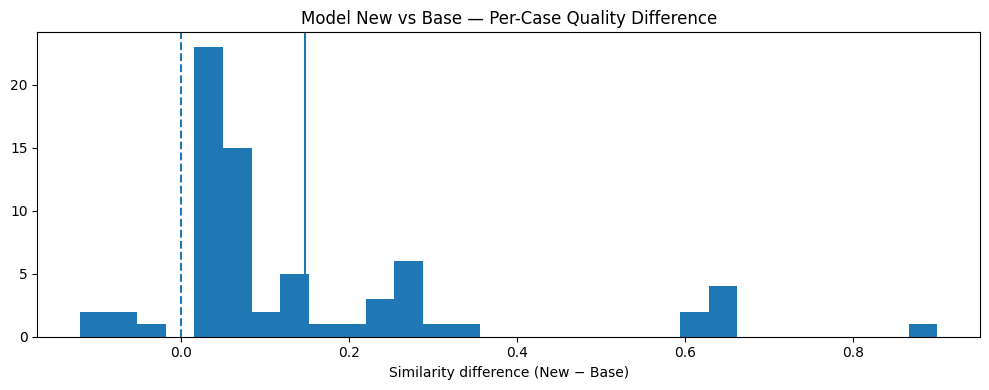

In [49]:
plt.figure(figsize=(10,4))
plt.hist(diff, bins=30)
plt.axvline(0, linestyle="--")
plt.axvline(diff.mean())
plt.title("Model New vs Base — Per-Case Quality Difference")
plt.xlabel("Similarity difference (New − Base)")
plt.tight_layout()
plt.show()

In [51]:
new_model["task_type"] = (
    new_model["instruction"]
    .str.lower()
    .str.extract(r'^(sort|compute|filter|extract|group)')
    .fillna("other")
)

base_model["task_type"] = (
    base_model["instruction"]
    .str.lower()
    .str.extract(r'^(sort|compute|filter|extract|group)')
    .fillna("other")
)

In [52]:
task_stats_new = (
    new_model.groupby("task_type")
      .agg(
          accuracy=("is_correct", "mean"),
          avg_similarity=("similarity_score", "mean"),
          error_rate=("is_correct", lambda x: 1 - x.mean()),
          avg_error_severity=("similarity_score", lambda x: (1 - x).mean()),
          count=("test_case_id", "count")
      )
      .sort_values("accuracy")
)

task_stats_new

,accuracy,avg_similarity,error_rate,avg_error_severity,count
task_type,,,,,
compute,0.062500,0.800625,0.937500,0.199375,32
filter,0.285714,0.802857,0.714286,0.197143,14
sort,0.333333,0.853333,0.666667,0.146667,24


In [53]:
task_stats_base = (
    base_model.groupby("task_type")
      .agg(
          accuracy=("is_correct", "mean"),
          avg_similarity=("similarity_score", "mean"),
          error_rate=("is_correct", lambda x: 1 - x.mean()),
          avg_error_severity=("similarity_score", lambda x: (1 - x).mean()),
          count=("test_case_id", "count")
      )
      .sort_values("accuracy")
)

task_stats_base

,accuracy,avg_similarity,error_rate,avg_error_severity,count
task_type,,,,,
compute,0.000000,0.540625,1.000000,0.459375,32
filter,0.071429,0.740714,0.928571,0.259286,14
sort,0.333333,0.804583,0.666667,0.195417,24


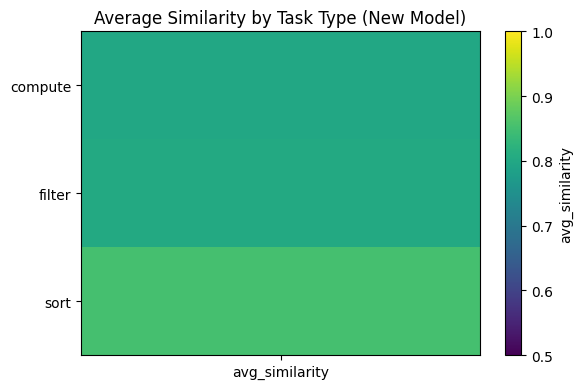

In [61]:
plt.figure(figsize=(6,4))
plt.imshow(
    task_stats_new[["avg_similarity"]].values,
    aspect="auto",
    vmin=0.5,
    vmax=1.0
)
plt.xticks([0], ["avg_similarity"])
plt.yticks(range(len(task_stats_new)), task_stats_new.index)
plt.colorbar(label="avg_similarity")
plt.title("Average Similarity by Task Type (New Model)")
plt.tight_layout()
plt.show()

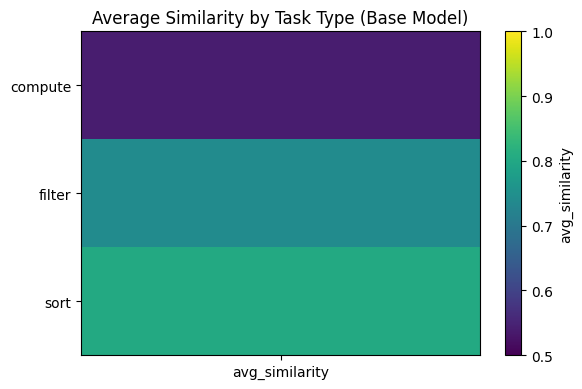

In [62]:
plt.figure(figsize=(6,4))
plt.imshow(
    task_stats_base[["avg_similarity"]].values,
    aspect="auto",
    vmin=0.5,
    vmax=1.0
)
plt.xticks([0], ["avg_similarity"])
plt.yticks(range(len(task_stats_base)), task_stats_base.index)
plt.colorbar(label="avg_similarity")
plt.title("Average Similarity by Task Type (Base Model)")
plt.tight_layout()
plt.show()

/var/folders/tt/5g7kjc2j66b3f51x1pj2tcqh0000gn/T/ipykernel_21203/295813842.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  new_model.pivot_table(


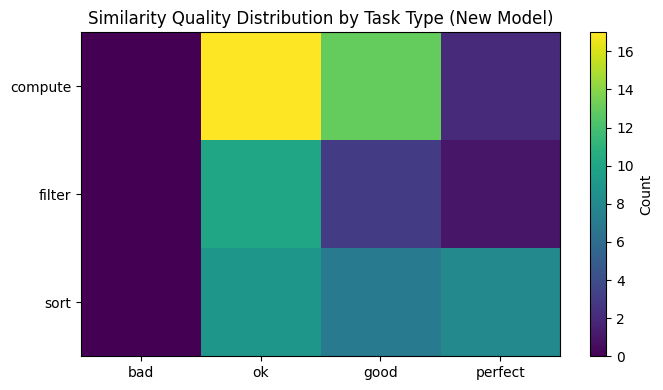

In [63]:
new_model["sim_bin"] = pd.cut(
    new_model["similarity_score"],
    bins=[0, 0.6, 0.8, 0.95, 1.0],
    labels=["bad", "ok", "good", "perfect"]
)

pivot = (
    new_model.pivot_table(
        index="task_type",
        columns="sim_bin",
        values="test_case_id",
        aggfunc="count",
        fill_value=0
    )
)

plt.figure(figsize=(7,4))
plt.imshow(pivot.values, aspect="auto")
plt.xticks(range(len(pivot.columns)), pivot.columns)
plt.yticks(range(len(pivot.index)), pivot.index)
plt.colorbar(label="Count")
plt.title("Similarity Quality Distribution by Task Type (New Model)")
plt.tight_layout()
plt.show()

/var/folders/tt/5g7kjc2j66b3f51x1pj2tcqh0000gn/T/ipykernel_21203/2786547845.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  base_model.pivot_table(


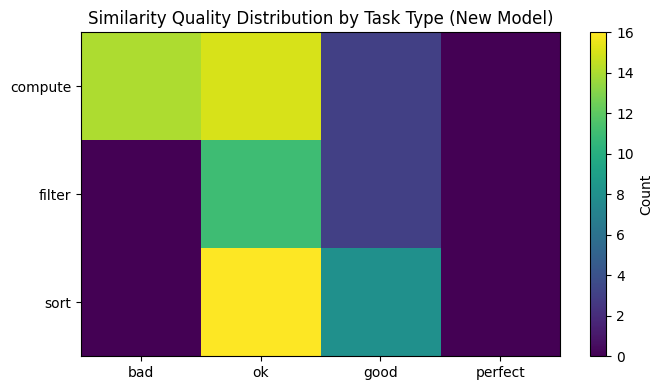

In [64]:
base_model["sim_bin"] = pd.cut(
    base_model["similarity_score"],
    bins=[0, 0.6, 0.8, 0.95, 1.0],
    labels=["bad", "ok", "good", "perfect"]
)

pivot = (
    base_model.pivot_table(
        index="task_type",
        columns="sim_bin",
        values="test_case_id",
        aggfunc="count",
        fill_value=0
    )
)

plt.figure(figsize=(7,4))
plt.imshow(pivot.values, aspect="auto")
plt.xticks(range(len(pivot.columns)), pivot.columns)
plt.yticks(range(len(pivot.index)), pivot.index)
plt.colorbar(label="Count")
plt.title("Similarity Quality Distribution by Task Type (New Model)")
plt.tight_layout()
plt.show()